#Finite Differece Code for Hele-Shaw Cell aka. Poiseuille Flow in 2D

## Importing Libraries

In [9]:
%matplotlib inline

from scipy import sparse
from scipy.sparse import linalg
import numpy as np
import matplotlib.pyplot as plt
import math
from pylab import *

## Parameters

Assuming the incompressible Navier-Stokes Equation:
$${\partial u_x\over \partial t}=-{1\over \rho}{\partial p\over \partial x}+\nu{\partial^2 u_x \over \partial y^2},$$
we know from the nature of the problem that ${\partial p \over \partial x}={\Delta p\over L}$. Namely the above becomes:
$${\partial u_x\over \partial t}=-{1\over \rho}{\Delta p\over L}+\nu{\partial^2 u_x \over \partial y^2}.$$
Where we define the above parameters below. For simplicity let 
$$\xi={1\over \rho}{\Delta p\over L} $$
such that
$${\partial u_x\over \partial t}=-\xi+\nu{\partial^2 u_x \over \partial y^2}.$$

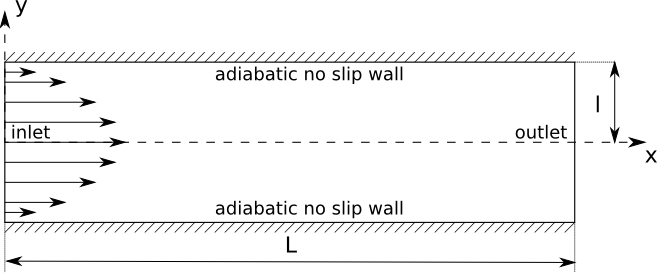

In [2]:
from IPython.display import Image
Image(filename = 'images/poiseuille.png')

In [3]:
rho= 1000 #[kg/m^3]
deltaP=100000 #[Pa]
L=15 #length of tube in [m], assuming that the flow is 1D, though
nu= 1 # kinematic viscocity[m^2/s]
I=2 # upward dimension of tube, analogous to diameter of circular tube
N=1000 #Number of points on the grid
mu=nu*rho #dynamic viscosity

## Finite Difference Code Implementation

Here we iplement a finite difference code for the above equations with the above parameters.

The code is implemented using a center difference discretization in space. 

In [44]:
#calculating using finite difference
def RunAnalysis(I,N,rho,deltaP,L,nu):
    xi=(1.0/(rho))*(deltaP/L)*0.89
    y=np.linspace(-I,I,N)
    deltaY=2.0*I/(N-1)
    A=np.zeros((len(y),len(y)))
    for ii in range(0,len(y)):
        A[ii,ii]=2
        if ii!=0:
            A[ii,ii-1]=-1
            A[ii-1,ii]=-1
    #print 'A=',A
    A=A*(deltaY**-2)*nu
    ff=np.ones((len(y)))*xi
    u=np.linalg.solve(A,ff)
    return y,u


In [45]:
#Calculating the numerical values
y,u=RunAnalysis(I,N,rho,deltaP,L,nu)
#Calculating the equivalent analytical values
u_comp=(deltaP/(2*mu*L))*(I**2-y**2)

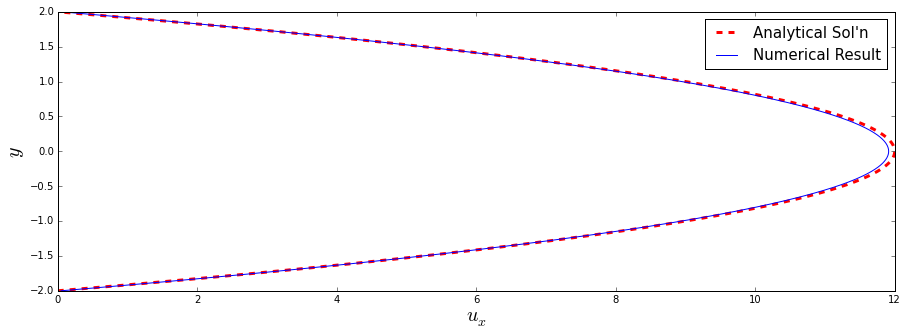

In [46]:
#plotting
fig = plt.figure(figsize=(15,5))
plt.plot(u_comp,y,'--r',label='Analytical Sol\'n',linewidth=3)
plt.plot(u,y,label='Numerical Result')
plt.xlabel('$u_x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [31]:
print max(u_comp)/max(u)

0.896496835312


## Changing the viscosity ($\nu$) what happens?

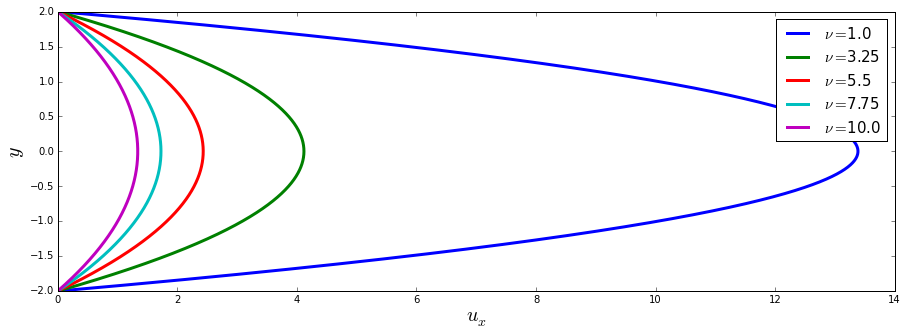

In [49]:
fig = plt.figure(figsize=(15,5))
for nuxx in np.linspace(1,10,5):
    y,u=RunAnalysis(I,N,rho,deltaP,L,nuxx)
    plt.plot(u,y,'-',label=r'$\nu=$'+str(nuxx),linewidth=3)
    plt.xlabel('$u_x$',fontsize=20)
    plt.ylabel('$y$',fontsize=20)
    plt.legend(fontsize=15)
plt.show()

## Changing the density ($\rho$) what happens?

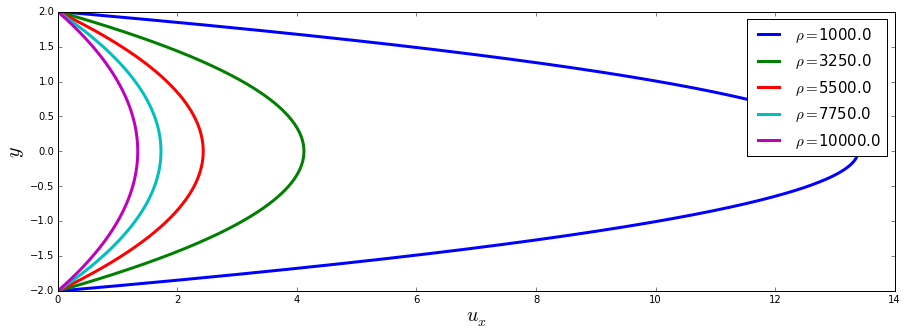

In [48]:
fig = plt.figure(figsize=(15,5))
for rhoxx in np.linspace(1000,10000,5):
    y,u=RunAnalysis(I,N,rhoxx,deltaP,L,nu)
    plt.plot(u,y,'-',label=r'$\rho=$'+str(rhoxx),linewidth=3)
    plt.xlabel('$u_x$',fontsize=20)
    plt.ylabel('$y$',fontsize=20)
    plt.legend(fontsize=15)
plt.show()

## Changing the pressure drop ($\Delta p$) what happens?

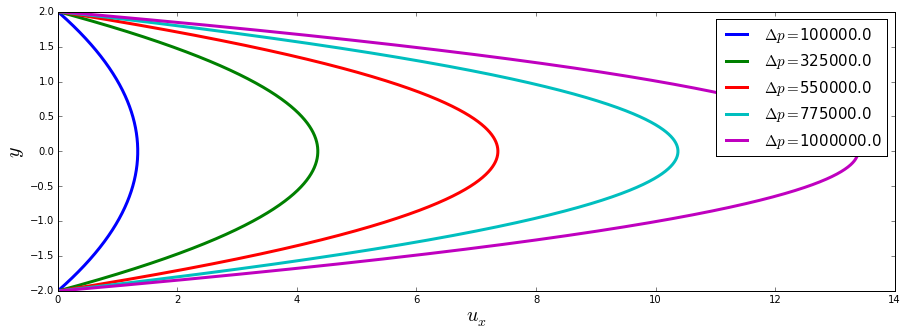

In [53]:
fig = plt.figure(figsize=(15,5))
for deltaPxx in np.linspace(100000,1000000,5):
    y,u=RunAnalysis(I,N,rhoxx,deltaPxx,L,nu)
    plt.plot(u,y,'-',label=r'$\Delta p=$'+str(deltaPxx),linewidth=3)
    plt.xlabel('$u_x$',fontsize=20)
    plt.ylabel('$y$',fontsize=20)
    plt.legend(fontsize=15)
plt.show()

In [ ]:
def RunAnalysis2(I,N,rho,deltaP,L,nu):
    xi=(1.0/(rho))*(deltaP/L)
    y = np.linspace(-I, I, N)
    dy = 2.0 * I / (N - 1)
    data = np.array([-2.0 * np.ones(N), np.ones(N), np.ones(N)]) * nu / (dy * dy)
    data[1][-2] = 0.0
    data[2][1] = 0.0
    matrix = sparse.dia_matrix((data, (0, -1, 1)), shape = (N, N))
    rhs = np.ones(N) * xi
    rhs[0], rhs[-1] = 0, 0
    print matrix
    inv_matrix = linalg.inv(matrix)
    u = inv_matrix * rhs
    return y,u